In [1]:
#pip install tweepy
#pip install TextBlob

In [2]:
import pandas as pd
import numpy as np
import tweepy
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import re
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import matplotlib.pyplot as plt 


In [3]:
# We load our dataset that contains all tweets published from 10/2/2021
# and include any of the hashtags #bitcoin or #btc

df_tweets = pd.read_csv('Bitcoin_tweets.csv')

# Of the 13 columns, we will only use Date (tweet publication date)
# and Text (tweet content)

df_tweets = df_tweets.iloc[:, [8,9]]
df_tweets

C:\Users\borre\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,5,6,7,12) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,date,text
0,2021-02-10 23:59:04,Blue Ridge Bank shares halted by NYSE after #b...
1,2021-02-10 23:58:48,"😎 Today, that's this #Thursday, we will do a ""..."
2,2021-02-10 23:54:48,"Guys evening, I have read this article about B..."
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
4,2021-02-10 23:54:06,This network is secured by 9 508 nodes as of t...
...,...,...
4012396,2022-07-11 15:24:39,Full if👉🏻 https://t.co/OafLKc66cX #bitcoin #bt...
4012397,2022-07-11 15:24:34,You can’t believe how honored and proud I am t...
4012398,2022-07-11 15:24:31,$MNW has one of the highest upside in any comp...
4012399,2022-07-11 15:24:24,"Why #bitcoin, #ethereum, and #Dogecoin Are Fal..."


In [4]:
# We delete rows which empty values
print(df_tweets['text'].isna().sum())
print(df_tweets['date'].isna().sum())

df_tweets = df_tweets.dropna()

print(df_tweets['text'].isna().sum())
print(df_tweets['date'].isna().sum())

148
148
0
0


In [5]:
# Due to the high number of tweets in the dataset, we will work with the tweets
# published in 2021

df_tweets_2021 = df_tweets.loc[(df_tweets['date'] >= "2021-01-01 00:00:00") & (df_tweets['date'] <= "2021-12-31 23:59:00")]
print(df_tweets_2021.head(20))

                   date                                               text
0   2021-02-10 23:59:04  Blue Ridge Bank shares halted by NYSE after #b...
1   2021-02-10 23:58:48  😎 Today, that's this #Thursday, we will do a "...
2   2021-02-10 23:54:48  Guys evening, I have read this article about B...
3   2021-02-10 23:54:33  $BTC A big chance in a billion! Price: \487264...
4   2021-02-10 23:54:06  This network is secured by 9 508 nodes as of t...
5   2021-02-10 23:53:30  💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...
6   2021-02-10 23:53:17  &lt;'fire' &amp; 'man'&gt;\n#Bitcoin #Crypto #...
7   2021-02-10 23:52:42  🔄 Prices update in $EUR (1 hour):\n\n$BTC   - ...
8   2021-02-10 23:52:25  #BTC #Bitcoin #Ethereum #ETH #Crypto #cryptotr...
9   2021-02-10 23:52:08  .@Tesla’s #bitcoin investment is revolutionary...
10  2021-02-10 23:52:04  Annnd #btc #Bitcoin is headed even higher now....
11  2021-02-10 23:51:25  🔄 Prices update in $USDT (1 hour):\n\n$BTC - 4...
12  2021-02-10 23:50:59  

In [6]:
# We remove tweets that contain incorrect information in the date column

print(df_tweets_2021[df_tweets_2021['date'].str.contains(r'(\[\')')])
df_tweets_2021_cleaned = df_tweets_2021.drop(df_tweets_2021[df_tweets_2021['date']
                                                            .str.contains(r'(\[\')')].index)

C:\Users\borre\AppData\Local\Temp/ipykernel_18176/2985869901.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  print(df_tweets_2021[df_tweets_2021['date'].str.contains(r'(\[\')')])


Empty DataFrame
Columns: [date, text]
Index: []


C:\Users\borre\AppData\Local\Temp/ipykernel_18176/2985869901.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_tweets_2021_cleaned = df_tweets_2021.drop(df_tweets_2021[df_tweets_2021['date']


In [7]:
# Since we have a large number of tweets (4012401), we are going to remove all tweets
# that contain a hyperlink starting with https, as the majority of these are spam and may contain characters
# like #ðŸŽâšï†Œ

print(df_tweets_2021[df_tweets_2021['text'].str.contains(r'(https:)')])
df_tweets_2021_cleaned = df_tweets_2021.drop(df_tweets_2021[df_tweets_2021['text']
                                                            .str.contains(r'(https:)')].index)
df_tweets_2021_cleaned

C:\Users\borre\AppData\Local\Temp/ipykernel_18176/2802023724.py:5: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  print(df_tweets_2021[df_tweets_2021['text'].str.contains(r'(https:)')])


                        date  \
0        2021-02-10 23:59:04   
1        2021-02-10 23:58:48   
2        2021-02-10 23:54:48   
4        2021-02-10 23:54:06   
5        2021-02-10 23:53:30   
...                      ...   
1999528  2021-12-29 19:53:47   
1999529  2021-12-29 19:53:40   
1999530  2021-12-29 19:53:36   
1999531  2021-12-29 19:53:33   
1999532  2021-12-29 19:53:31   

                                                      text  
0        Blue Ridge Bank shares halted by NYSE after #b...  
1        😎 Today, that's this #Thursday, we will do a "...  
2        Guys evening, I have read this article about B...  
4        This network is secured by 9 508 nodes as of t...  
5        💹 Trade #Crypto on #Binance \n\n📌 Enjoy #Cashb...  
...                                                    ...  
1999528  #Bitcoin falls from ATHs have been a lot worse...  
1999529  OlegBarca's Stream №547! Live in few mins!\n\n...  
1999530  Crypto: MistToken\nSymbol: #MistSwap \nMistSwa...  
19995

C:\Users\borre\AppData\Local\Temp/ipykernel_18176/2802023724.py:6: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  df_tweets_2021_cleaned = df_tweets_2021.drop(df_tweets_2021[df_tweets_2021['text']


,date,text
3,2021-02-10 23:54:33,$BTC A big chance in a billion! Price: \487264...
16,2021-02-10 23:48:37,@naval #BTC is unconfiscatable \n\nAll roads l...
17,2021-02-10 23:47:32,$BTC A big chance in a million! Price: \489863...
24,2021-02-10 23:44:57,"The writing is on the wall, and you are ignori..."
28,2021-02-10 23:42:49,Let's go $yfi... Let's make this happen before...
...,...,...
1999523,2021-12-29 19:53:58,@bot_cryptpo #BTC HELLO
1999524,2021-12-29 19:53:56,@cryptocom @ConvexFinance We are in the lead\n...
1999525,2021-12-29 19:53:55,I like that some of the small coins aren’t fol...
1999527,2021-12-29 19:53:49,@cryptocom @ConvexFinance Buy Fegtoken before ...


In [8]:
# Since we still have a large number of tweets (912804), we are going to randomly select a set of 50000 tweets
# in order to expedite the processing of the algorithms we will use later

df_sample = df_tweets_2021_cleaned.sample(n=50000)
df_sample

,date,text
1331268,2021-10-23 11:30:29,@fiat_money @gabeh730 @BeantownHodl @Stephanie...
1530373,2021-10-28 19:33:33,@MoosaviNafas @elonmusk @teslaownersSV @Teslar...
1746285,2021-11-11 13:34:53,@NFTanks_Game NFTanks ecosystem can be profita...
1985427,2021-12-30 13:07:40,@BitcoinMagazine A great leader would cancel t...
730174,2021-08-09 19:15:52,Bitcoin is rapidly becoming the global reserve...
...,...,...
1944981,2021-12-11 23:14:56,My dad is 64...\n\nMy dad owns 0.15 #Bitcoin (...
410063,2021-07-23 07:54:12,@darwinbitcoin @Tseday @Olympics @jack @Twitte...
393611,2021-07-23 22:38:48,jk @TheMoonCarl. You are one of the top accoun...
1433712,2021-10-22 00:00:44,#BTC $EGLD $ONE $ADA...Go and invest❤⚡💙🔥


In [9]:
# We have successfully reduced our dataset to 912804 tweets
# We proceed with the preprocessing of the text in the tweets

def cleanTweet(tweet):
    tweet = re.sub('#bitcoin', 'bitcoin', tweet) #Eliminamos # del hashtag #bitcoin
    tweet = re.sub('#Bitcoin', 'Bitcoin', tweet) #Eliminamos # del hashtag #Bitcoin
    tweet = re.sub('#[A-Za-z0-9]+', '', tweet) #Eliminamos cualquier otro hashtag
    return tweet

In [10]:
df_sample['text'] = df_sample['text'].apply(cleanTweet)

In [11]:
# We format the date field to only display the date

def formatDate(date):
    date = re.sub(r'\s.*', '', date)
    return date

In [12]:
df_sample['date'] = df_sample['date'].apply(formatDate)

In [13]:
df_sample

,date,text
1331268,2021-10-23,@fiat_money @gabeh730 @BeantownHodl @Stephanie...
1530373,2021-10-28,@MoosaviNafas @elonmusk @teslaownersSV @Teslar...
1746285,2021-11-11,@NFTanks_Game NFTanks ecosystem can be profita...
1985427,2021-12-30,@BitcoinMagazine A great leader would cancel t...
730174,2021-08-09,Bitcoin is rapidly becoming the global reserve...
...,...,...
1944981,2021-12-11,My dad is 64...\n\nMy dad owns 0.15 Bitcoin (I...
410063,2021-07-23,@darwinbitcoin @Tseday @Olympics @jack @Twitte...
393611,2021-07-23,jk @TheMoonCarl. You are one of the top accoun...
1433712,2021-10-22,$EGLD $ONE $ADA...Go and invest❤⚡💙🔥


### Sentiment Analysis

In [14]:
# We create a function to obtain the subjectivity

def getSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

# We create a function to obtain the polarity

def getPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

In [15]:
# We create two new columns in our tweets dataframe

df_sample["Subjectivity"] = df_sample['text'].apply(getSubjectivity)
df_sample["Polarity"] = df_sample['text'].apply(getPolarity)

In [16]:
# We create a new function to obtaien the sentiment scores

def getSScores(tweet):
    sia = SentimentIntensityAnalyzer()
    sentiment = sia.polarity_scores(tweet)
    return sentiment

In [17]:
# We create the variables for each sentiment score

compound = []
neg = []
pos = []
neu = []
SIA = 0

for i in range(len(df_sample)):
    SIA = getSScores(df_sample.iloc[i, 1])
    compound.append(SIA['compound'])
    neg.append(SIA['neg'])
    neu.append(SIA['neu'])
    pos.append(SIA['pos'])

In [18]:
# We create a new column for each calculated variable

df_sample['Compound'] = compound
df_sample['Negative'] = neg
df_sample['Neutral'] = neu
df_sample['Positive'] = pos

In [19]:
df_sample

,date,text,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
1331268,2021-10-23,@fiat_money @gabeh730 @BeantownHodl @Stephanie...,0.443750,-0.031250,0.7003,0.000,0.855,0.145
1530373,2021-10-28,@MoosaviNafas @elonmusk @teslaownersSV @Teslar...,0.000000,0.000000,0.0000,0.000,1.000,0.000
1746285,2021-11-11,@NFTanks_Game NFTanks ecosystem can be profita...,0.500000,0.187500,0.7351,0.000,0.842,0.158
1985427,2021-12-30,@BitcoinMagazine A great leader would cancel t...,0.480000,0.250000,0.8805,0.038,0.733,0.229
730174,2021-08-09,Bitcoin is rapidly becoming the global reserve...,0.425000,0.225000,0.3612,0.000,0.865,0.135
...,...,...,...,...,...,...,...,...
1944981,2021-12-11,My dad is 64...\n\nMy dad owns 0.15 Bitcoin (I...,0.400000,0.100000,0.7003,0.000,0.845,0.155
410063,2021-07-23,@darwinbitcoin @Tseday @Olympics @jack @Twitte...,0.377778,0.190476,0.9280,0.000,0.762,0.238
393611,2021-07-23,jk @TheMoonCarl. You are one of the top accoun...,0.500000,0.500000,0.7579,0.000,0.706,0.294
1433712,2021-10-22,$EGLD $ONE $ADA...Go and invest❤⚡💙🔥,0.000000,0.000000,0.0000,0.000,1.000,0.000


In [20]:
df_tweets_final = df_sample[['date','Subjectivity', 'Polarity', 'Compound', 'Negative', 
                            'Neutral', 'Positive']].groupby('date').mean()
df_tweets_final

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
date,,,,,,
2021-02-05,0.313057,0.013864,-0.045567,0.123833,0.730333,0.145833
2021-02-06,0.194091,0.037727,0.073636,0.025000,0.909136,0.065864
2021-02-07,0.222745,0.137059,0.195676,0.009412,0.848941,0.141647
2021-02-08,0.256553,0.139831,0.158620,0.015864,0.893682,0.090500
2021-02-09,0.201693,0.116832,0.171526,0.016037,0.896222,0.087852
...,...,...,...,...,...,...
2021-11-26,0.395245,0.169779,0.284524,0.035447,0.811454,0.153095
2021-12-11,0.358829,0.132228,0.223543,0.041585,0.826006,0.132415
2021-12-17,0.385362,0.169734,0.304728,0.046938,0.809074,0.143936


In [21]:
# We create a new column with Date

df_tweets_final["Date"] = df_tweets_final.index
df_tweets_final

,Subjectivity,Polarity,Compound,Negative,Neutral,Positive,Date
date,,,,,,,
2021-02-05,0.313057,0.013864,-0.045567,0.123833,0.730333,0.145833,2021-02-05
2021-02-06,0.194091,0.037727,0.073636,0.025000,0.909136,0.065864,2021-02-06
2021-02-07,0.222745,0.137059,0.195676,0.009412,0.848941,0.141647,2021-02-07
2021-02-08,0.256553,0.139831,0.158620,0.015864,0.893682,0.090500,2021-02-08
2021-02-09,0.201693,0.116832,0.171526,0.016037,0.896222,0.087852,2021-02-09
...,...,...,...,...,...,...,...
2021-11-26,0.395245,0.169779,0.284524,0.035447,0.811454,0.153095,2021-11-26
2021-12-11,0.358829,0.132228,0.223543,0.041585,0.826006,0.132415,2021-12-11
2021-12-17,0.385362,0.169734,0.304728,0.046938,0.809074,0.143936,2021-12-17


In [22]:
# We load our dataset with the historical price of Bitcoin since 01-01-2028

df_btc = pd.read_csv('BTC-USD.csv')

# We extract only Data and Open (Opening price) columns

df_btc = df_btc.iloc[:, [0,1]]

# Since we only have tweets from 10/2/2021 onwards, we extract the Bitcoin prices from that date

df_btc = df_btc.loc[(df_btc['Date'] >= "2021-01-01") & (df_btc['Date'] <= "2021-12-31")]
df_btc


,Date,Open
1096,2021-01-01,28994.009766
1097,2021-01-02,29376.455078
1098,2021-01-03,32129.408203
1099,2021-01-04,32810.949219
1100,2021-01-05,31977.041016
...,...,...
1456,2021-12-27,50802.609375
1457,2021-12-28,50679.859375
1458,2021-12-29,47623.871094
1459,2021-12-30,46490.605469


In [23]:
# We merge the two datasets

df = df_btc.merge(df_tweets_final, how = "inner", on = "Date")

df["Date"] = pd.to_datetime(df["Date"])
df.head(50)

,Date,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
0,2021-02-05,36931.546875,0.313057,0.013864,-0.045567,0.123833,0.730333,0.145833
1,2021-02-06,38138.386719,0.194091,0.037727,0.073636,0.025000,0.909136,0.065864
2,2021-02-07,39250.191406,0.222745,0.137059,0.195676,0.009412,0.848941,0.141647
3,2021-02-08,38886.828125,0.256553,0.139831,0.158620,0.015864,0.893682,0.090500
4,2021-02-09,46184.992188,0.201693,0.116832,0.171526,0.016037,0.896222,0.087852
5,2021-02-10,46469.761719,0.252388,0.105003,0.032850,0.078667,0.839667,0.081708
6,2021-02-13,47491.203125,0.178308,0.064000,0.193315,0.029154,0.822308,0.148615
7,2021-02-14,47114.507813,0.252329,0.134352,0.210819,0.022031,0.851875,0.126125
8,2021-02-15,48696.535156,0.224054,0.097563,0.158319,0.050938,0.856313,0.092875
9,2021-02-18,52140.972656,0.299216,0.143064,0.068424,0.050353,0.855059,0.094529


In [24]:
df.loc[(df["Date"] >= "2021-08-01") & (df['Date'] <= "2021-08-31")]

,Date,Open,Subjectivity,Polarity,Compound,Negative,Neutral,Positive
58,2021-08-04,38213.332031,0.320506,0.171955,0.095485,0.053176,0.868382,0.078441
59,2021-08-05,39744.515625,0.368479,0.156078,0.236761,0.036896,0.839566,0.123531
60,2021-08-06,40865.867188,0.383751,0.197070,0.318161,0.025211,0.831501,0.143288
61,2021-08-07,42832.796875,0.371417,0.185162,0.253427,0.028751,0.837309,0.133940
62,2021-08-08,44574.437500,0.388243,0.199989,0.315450,0.033085,0.805086,0.161834
63,2021-08-09,43791.925781,0.386723,0.198800,0.363472,0.031684,0.794389,0.173920
64,2021-08-14,47810.687500,0.414448,0.222005,0.327138,0.030413,0.801403,0.168169
65,2021-08-15,47096.667969,0.406780,0.229702,0.355672,0.030977,0.785716,0.183310
66,2021-08-16,47019.960938,0.396924,0.203276,0.347899,0.029516,0.803762,0.166713
67,2021-08-17,45936.457031,0.412491,0.248390,0.388273,0.027261,0.780091,0.192651


Text(0.02, 0.85, 'Negativity')

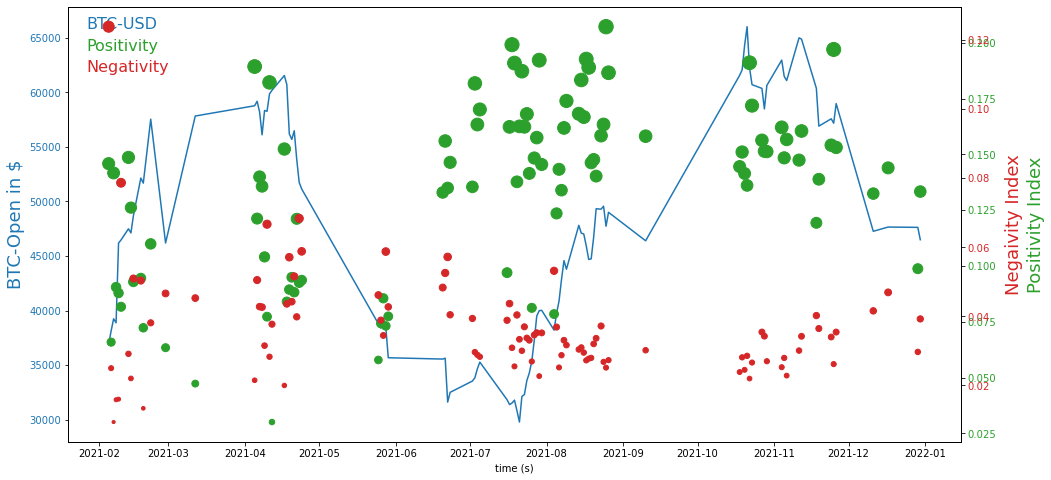

In [25]:
x = df['Date']
fig, ax1 = plt.subplots(figsize=(16, 8), sharex=False)

# Graph of the opening price of BTC in 2021

color = 'tab:blue'
y = df['Open']
ax1.set_xlabel('time (s)')
ax1.set_ylabel('BTC-Open in $', color=color, fontsize=18)
ax1.plot(x, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.text(0.02, 0.95, 'BTC-USD',  transform=ax1.transAxes, color=color, fontsize=16)

# Graph of the Neutrality Coefficient

color = 'tab:green'
y = df['Positive']
ax2 = ax1.twinx()  
ax2.scatter(x, y, color=color, s=1000*df['Positive'])
ax2.set_ylabel('Positivity Index', color=color, fontsize=18, labelpad=30)  
ax2.tick_params(axis='y', labelcolor=color)
ax2.text(0.02, 0.9, 'Positivity',  transform=ax2.transAxes, color=color, fontsize=16)

# Graph of the Neutrality Coefficient

color = 'tab:red'
y = df['Negative']
ax3 = ax1.twinx()  
ax3.scatter(x, y, color=color, s=1000*df['Negative'])
ax3.set_ylabel('Negaivity Index', color=color, fontsize=18, labelpad=15)  
ax3.tick_params(axis='y', labelcolor=color)
ax3.text(0.02, 0.85, 'Negativity',  transform=ax3.transAxes, color=color, fontsize=16)

### Prediction

In [26]:
# We transform our Data column from string to datetime to avoid issues when running the model later

df["Date"] = pd.to_numeric(pd.to_datetime(df["Date"]))

# We create our variable X and remove the column from which we want to predict the value (Open)

X = df.loc[:, df.columns != "Open"] 

# We create out target variable

y = df.iloc[:, 1]

# We split out dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [27]:
# We built our model
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

model_lr = LinearRegression().fit(X_train, y_train)
model_rf = RandomForestRegressor().fit(X_train, y_train)
model_kn = KNeighborsRegressor().fit(X_train, y_train)
model_sv = SVR().fit(X_train, y_train)

In [28]:
predictions_lr = model_lr.predict(X_test)
predictions_rf = model_rf.predict(X_test)
predictions_kn = model_kn.predict(X_test)
predictions_sv = model_sv.predict(X_test)

In [29]:
# We compare results

df_predictions = pd.DataFrame()
df_predictions["Date"] = pd.to_datetime(X_test.loc[:, "Date"])
df_predictions["y_test"] = y_test
df_predictions["y_test_predicted_lr"] = predictions_lr
df_predictions["y_test_predicted_rf"] = predictions_rf
df_predictions["y_test_predicted_kn"] = predictions_kn
df_predictions["y_test_predicted_sv"] = predictions_sv
df_predictions =df_predictions.sort_values(by="Date")
df_predictions

,Date,y_test,y_test_predicted_lr,y_test_predicted_rf,y_test_predicted_kn,y_test_predicted_sv
1,2021-02-06,38138.386719,45500.145914,45899.861446,44838.402344,47638.799538
2,2021-02-07,39250.191406,45518.826850,47414.891485,44838.402344,47638.799542
3,2021-02-08,38886.828125,45537.507787,47376.274024,44838.402344,47638.799546
14,2021-04-05,58760.875000,46583.640244,57854.950508,58326.229688,47638.799763
19,2021-04-10,58253.777344,46677.044928,56048.908164,58527.032032,47638.799783
26,2021-04-21,56471.128906,46882.535231,54161.131719,55634.435938,47638.799825
37,2021-06-22,31622.376953,48040.753309,35560.965859,34778.530469,47638.800066
38,2021-06-23,32515.714844,48059.434245,34320.132852,34778.530469,47638.800070
41,2021-07-04,34665.566406,48264.924549,34263.216641,33945.364063,47638.800113
43,2021-07-16,31841.550781,48489.095790,36122.598457,31140.927344,47638.800159


Text(0.2, 0.95, 'Predicción KN')

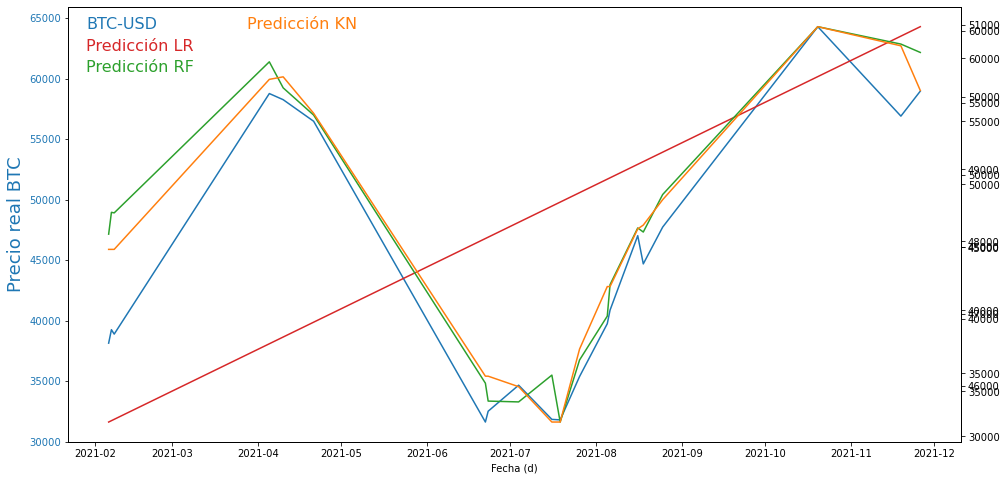

In [30]:
pred = df_predictions['Date']
fig, ax1 = plt.subplots(figsize=(16, 8), sharex=False)

# Graph of the actual opening price of BTC

color = 'tab:blue'
y = df_predictions['y_test']
ax1.set_xlabel('Fecha (d)')
ax1.set_ylabel('Precio real BTC', color=color, fontsize=18)
ax1.plot(pred, y, color=color)
ax1.tick_params(axis='y', labelcolor=color)
ax1.text(0.02, 0.95, 'BTC-USD',  transform=ax1.transAxes, color=color, fontsize=16)

# Graph of the LR algorithm prediction

color = 'tab:red'
y = df_predictions['y_test_predicted_lr']
ax2 = ax1.twinx()  
ax2.plot(pred, y, color=color)
ax2.text(0.02, 0.9, 'Predicción LR',  transform=ax1.transAxes, color=color, fontsize=16)

# Graph of the RF algorithm prediction

color = 'tab:green'
y = df_predictions['y_test_predicted_rf']
ax3 = ax1.twinx()  
ax3.plot(pred, y, color=color)
ax3.text(0.02, 0.85, 'Predicción RF',  transform=ax1.transAxes, color=color, fontsize=16)

# Graph of the KN algorithm prediction

color = 'tab:orange'
y = df_predictions['y_test_predicted_kn']
ax4 = ax1.twinx()  
ax4.plot(pred, y, color=color)
ax4.text(0.2, 0.95, 'Predicción KN',  transform=ax1.transAxes, color=color, fontsize=16)





In [31]:
# We calculate the RMSE errors for each algorithm

from sklearn.metrics import mean_squared_error 
from math import sqrt

rmse = []

rmse.append(sqrt(mean_squared_error(y_test,predictions_lr)))
rmse.append(sqrt(mean_squared_error(y_test,predictions_rf)))
rmse.append(sqrt(mean_squared_error(y_test,predictions_kn)))
rmse.append(sqrt(mean_squared_error(y_test,predictions_sv)))
rmse

[10982.195849864484, 3730.074456651145, 2872.318935363203, 11099.55846879163]

In [32]:
# We calculate the R2 errors for each algorithm

from sklearn.metrics import r2_score

r2 = []

r2.append(r2_score(y_test,predictions_lr))
r2.append(r2_score(y_test,predictions_rf))
r2.append(r2_score(y_test,predictions_kn))
r2.append(r2_score(y_test,predictions_sv))
r2


[-0.07076670595721368,
 0.876475958677032,
 0.9267543541703882,
 -0.09377475825769777]

In [33]:
# We calculate the percentage error in the prediction

error_lr=0
error_rf=0
error_kn=0
error_sv=0

error_per = []

Y_test = list(y_test)

for i in range(len(y_test)):
    error_lr+=(abs(Y_test[i]-predictions_lr[i])/Y_test[i])
    error_rf+=(abs(Y_test[i]-predictions_rf[i])/Y_test[i])
    error_kn+=(abs(Y_test[i]-predictions_kn[i])/Y_test[i])
    error_sv+=(abs(Y_test[i]-predictions_sv[i])/Y_test[i])
    
error_per.append(error_lr)
error_per.append(error_rf)
error_per.append(error_kn)
error_per.append(error_sv)

error_per

[4.973400068609622, 1.3562378992180673, 1.059349122863574, 4.961251568439202]

In [34]:
coefs = ["Error %","RMSE", "R score"]
df_errors = pd.DataFrame(columns = ["Coefs","Linear Regression", "Random Forest", "KNN", "SVR"])
df_errors.loc[0, "Coefs"] = coefs[0]
df_errors.loc[1, "Coefs"] = coefs[1]
df_errors.loc[2, "Coefs"] = coefs[2]


df_errors.loc[0, 1:] = error_per
df_errors.loc[1, 1:] = rmse
df_errors.loc[2, 1:] = r2
df_errors

C:\Users\borre\anaconda3\lib\site-packages\pandas\core\indexing.py:719: FutureWarning: Slicing a positional slice with .loc is not supported, and will raise TypeError in a future version.  Use .loc with labels or .iloc with positions instead.
  indexer = self._get_setitem_indexer(key)


,Coefs,Linear Regression,Random Forest,KNN,SVR
0,Error %,4.9734,1.356238,1.059349,4.961252
1,RMSE,10982.19585,3730.074457,2872.318935,11099.558469
2,R score,-0.070767,0.876476,0.926754,-0.093775
